In [7]:
#                                                       Analise de Dados com Python (Loja de Varejo)

#Uma loja de varejo deseja criar algumas métricas para acompanhar seus resultados, possuem a base de vendas e base de clientes, o objetivo e fazer todo o
#tratamento e união das bases para construção dessas métricas:
#-01 Departamentos mais vendidos
#-02 Média de preço com frete por nome de departamento
#-03 Quantidade de vendas por mês
#-04 Média de renda para cada tipo de canal de venda
#-05 Média de idade de clientes por bandeira

#Bibliotecas necessárias

import pandas as pd
import seaborn as sns

In [8]:
#Carregando a base de dados e visualizando as 5 primeiras linhas
vendas = pd.read_excel('/content/drive/MyDrive/Desafio 2 Analise de dados com Python Varejo/varejo.xlsx')
vendas.head()


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [9]:
#Pegando informações sobre os dados obs:Perceba que na linha preço e estado os valores estão diferente das demais linhas e os dados falam q não tem linhas faltantes
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [10]:
#Vamos fazer uma analise para saber quais canais de vendas
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [11]:
#Perceba que APP e Aplicativo são a mesma coisa...vamos deixar os dois apenas em uma base, no caso Aplicativos utilizando uma função chamada "".replace""

In [12]:
#Perceba que APP e Aplicativo são as mesma coisa...vamos deixar os dois apenas em uma base, no caso Aplicativos utilizando uma função chamada "".replace""
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace("APP", "Aplicativo") #Sempre observar se as strings foram copiadas corretamente, por causa do case sensitive
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [13]:
#Perceba que agora o app foi eliminado temos agora 3 categorias de canal vendas ficando padronizado

In [14]:
#Vamos observar se a bandeira esta padronizada tmb
vendas.groupby('bandeira').idcompra.nunique()


bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [15]:
#Tudo ok tmb

In [16]:
#Vamos olhar o estado tmb
vendas.groupby('estado').idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [17]:
#Vamos olhar agora nome departamento
vendas.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [18]:
#Como uma boa prática, precisamos colocar um underline para evitar espaços nulos e diminuir a nossa margem de erro do codigo,isso é uma boa pratica!
vendas [ 'Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(' ', '_')
vendas.groupby('Nome_Departamento').idcompra.nunique()



Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [19]:
#Perceba que agora todos os nomes que estão dentro de 'Nome_Departamentos estão com Underline para facilitar a leitura do ange quando percorrer

In [20]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [21]:
# Tratamentos de valores nulos

In [22]:
#Agora vamos entrar em tratamento de dados nulos, para isso precisamos visualizar eles para entender melhor: vamos usar a função "".isnull""
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [23]:
#Perceba que esses dados nulos não tem informações relevantes perante as análises que vamos fazer, esta faltando preço dos produtos e estado então vamos descartalos utilizando a função"".dropna()
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [24]:
#Veja que agora todas a linhas estão iguais, pois ele retirou todos que possuia nulos excluindo a linha inteira

In [25]:
#Observando minha premissa de negócio, ele pede para considerar os valores nulos de estado por MS, para isso usaremos a função:"".fillna"" e ""implace=True""salvando na base original
vendas['estado'].fillna('MS', inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [26]:
#Perceba que agora conseguimos substituir os valor nulos colocando o estado MS, porém o preço ainda continua com nulos, uma das formas de resolver isso é pegando a média de todos os valores ficando dessa forma
media_preco = vendas['Preço'].mean()
#após colocar essa nova variável agora vamos alocar dentro dos valores nulos dessa forma:
vendas['Preço'].fillna(media_preco, inplace = True)


In [27]:
media_preco

906.5891285439033

In [28]:
#agora que temos os valor médio e já alocado, vamos visualizar novamente os dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [29]:
#observe que agora todos os valores foram preenchidos e agora com o preço médio que alocamos nos espaços nulos

#cada caso será feito de uma forma diferente, importante entender esse conceito

In [30]:
#--------------------------------------------------------------------------------------------------------------------------------------------------#

In [31]:
#Filtrando os dados:
#Esse momento é importante para conseguir deixar visível apenas o necessário, aliviando processamento e começar extrair insights
#No modelo de negócio ele fala que o valor do frete não pode ficar maior do que com frete para as análises, então vamos analizar isso...
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


In [32]:
#Veja que só nessas primeiras linhas já observamos que tem preço com frete maior que apenas preço, vamos ver agora na média geral com a função ""describe""filtrando preço e preço com frete
vendas[['Preço','Preço_com_frete']].describe()


,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [33]:
#Analisando esses dados, precisamos colocar alguns filtros para limitar os valores que ultrapassam com o frete, ficará dessa forma:
preco_alto_com_frete = vendas.query('Preço > Preço_com_frete')

preco_certo = vendas.query('Preço < Preço_com_frete')
#Colocando esses dois filtros separando, consigo obter os dados necessários agora, agora vamos utilizar o ""describe"" novamente para observar os dados
preco_certo.describe()


,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [34]:
#Observe que tinha bastante valores acima com frete analisando com a base sem o filtro ainda, daqui pra frente seguiremos com essa nova base

In [35]:
preco_certo.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [36]:
#Agora vamos atender as premissas de negócio, a primeira delas é saber qual departamento mais vendido usando a função ""nunique""para deixar id unica e ""sort_value(assending = False)""deixando de forma decrescente
preco_certo.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending = False) #OBS caso queira visualizar de forma mais bonita coloque no final "".reset_index()""

Nome_Departamento
Bebes                     4353
Eletrodomesticos          4201
Eletroportateis           2223
Moveis                    2036
Utilidades_Domesticas     1366
Acessorios_e_Inovacoes    1243
Beleza_e_Saude            1054
Brinquedos                 686
Perfumaria                 563
Produtos_de_Limpeza        522
Telefones_e_Celulares      493
Automotivo                 457
Esporte_e_Lazer            446
Audio                      374
Ar_e_Ventilacao            337
Ferramentas                287
Informatica                284
Games                      200
TVs_e_Acessorios           158
Decoracao                  127
Malas_e_Mochilas            91
Cama,_Mesa_e_Banho          71
Tablets                     64
Casa_e_Construcao           58
Relogios                    45
Pet_Shop                    40
Linha_Industrial             9
Cine_e_Foto                  8
Moda                         3
Alimentos                    2
Instrumentos_Musicais        1
Name: idcompra, dtype

In [37]:
#os 3 produtos mais vendidos: Bebes 4353, Eletrodomesticos 4201, Eletroportateis 2223, primeira pergunta respondida

In [38]:
# A segunda premissa: Média de preço com frete por nome de departamento
round(preco_certo.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending = False),2)
#Observe que adicionamos a função ""round(,2)para selecionar numero de casas decimais no caso a função adiciona no começo e no final coloca o numero de casas

Nome_Departamento
TVs_e_Acessorios          3469.38
Informatica               2159.78
Linha_Industrial          2027.11
Cine_e_Foto               1851.20
Telefones_e_Celulares     1442.19
Eletrodomesticos          1400.66
Esporte_e_Lazer           1123.14
Tablets                   1100.23
Games                      942.90
Instrumentos_Musicais      834.61
Automotivo                 681.57
Moveis                     541.03
Ar_e_Ventilacao            518.79
Audio                      480.35
Casa_e_Construcao          433.53
Pet_Shop                   237.26
Acessorios_e_Inovacoes     229.14
Eletroportateis            223.77
Ferramentas                217.59
Cama,_Mesa_e_Banho         210.70
Malas_e_Mochilas           194.26
Relogios                   186.95
Brinquedos                 176.45
Utilidades_Domesticas      155.02
Decoracao                  144.50
Bebes                      130.90
Beleza_e_Saude             119.59
Alimentos                  104.24
Perfumaria                  80

In [39]:
# Terceira premissa: Quantidade de vendas por mês:
preco_certo.groupby('Data').idcompra.nunique().sort_values(ascending = False).reset_index()



,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [40]:
#Perceba que tem muita informação sobre as datas de vendas, vamos criar uma nova coluna para apenas indicar o mês com a função ""dt.month""
preco_certo['mês'] = preco_certo['Data'].dt.month
preco_certo.head()


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [41]:
preco_certo.groupby('mês').idcompra.nunique().sort_values(ascending=False).reset_index()

,mês,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [42]:
#Agora sim temos os valores de uma forma mais limpa e clara para identificar mês e quantidade vendida

In [43]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [44]:
# juntando tabelas, famoso "Join"

#Para responder as premissas faltantes precisaremos unir tabelas para extração de mais dados, vamos subir o outro arquivo com os dados clientes:
cliente = pd.read_excel("/content/drive/MyDrive/Desafio 2 Analise de dados com Python Varejo/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [45]:
# Analisando esses dados vamos fazer um describe para entender melhor
cliente [['idade', 'renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [46]:
#Vamos analisar se essa tabela tem dados nulos
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [47]:
#Agora vamos mudar a renda para float, para obter os numeros quebrados
cliente = cliente.astype({'renda':'float'})
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337.0
1,17590,54,2050.0
2,15478,47,8258.0
3,2933,39,4671.0
4,19790,26,9207.0


In [48]:
#Agora vamos a função bem importante que é unir tabelas, o procv do excel e leftjoin do SQL
vendas_clientes = preco_certo.merge(cliente, how = 'left', on='cliente_Log')
vendas_clientes.head(5)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [49]:
#Agora que conseguimos juntar as tabelas, nosso proxima premissa é tirar a média de cada tipo de canal de vendas, agora que temos as duas colunas conseguiremos tirar essa metrica
agg_idcanal_renda = round(vendas_clientes.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending = False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [50]:
# Última premissa de negócio é saber a média de idade dos clientes:
agg_idade_bandeira = round(vendas_clientes.groupby('bandeira')['idade'].agg('mean').sort_values(ascending = False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [51]:
#Agora que todas as metricas fora feitas e as premissas e correções da base de dados finalizamos aqui nossas análises

In [52]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [53]:
# Criando dashboard para visualizações dos dados e para isso vamos inserir uma biblioteca  de visualização de dados
import matplotlib.pyplot as plt


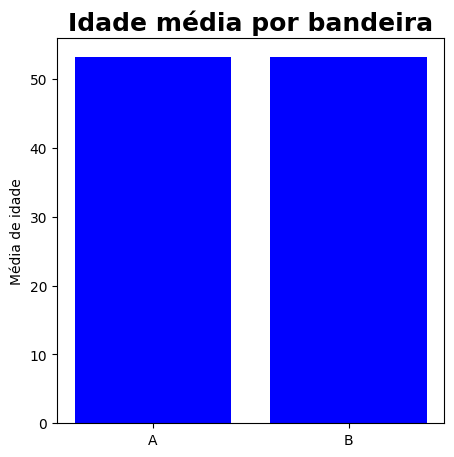

In [54]:
#Nessa parte aprenderemos a passar alguns parâmetros para acertar nossos gráficos para saber a idade média por bandeira:

fig = plt.figure(figsize = (5,5)) #tamanho da imagem que o gráfico ficará dentro

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color = "blue") #cor das barras do gráfico

plt.ylabel('Média de idade') #nome que ficará na lateral esquerda do gráfico

plt.title('Idade média por bandeira', loc = 'center', fontsize=18, fontweight = 'bold', color = 'black'); #Cabeçalho do gráfico, centralização, tamanho, densidade da fonte "Tipo um negrito" e cor preto

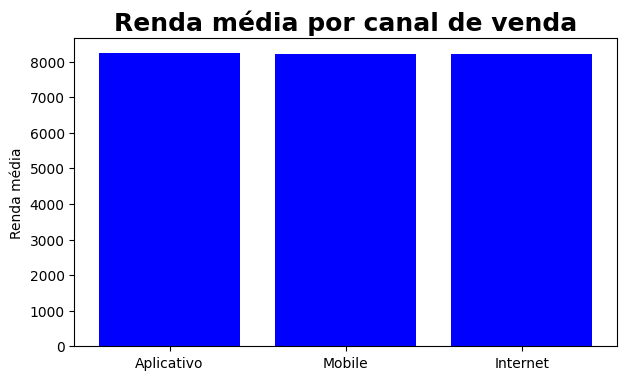

In [55]:
#Fazendo um grafico de barras para saber as vendas de cada canal :

fig = plt.figure(figsize=(7,4))

plt.bar(agg_idcanal_renda['idcanalvenda'], agg_idcanal_renda['renda'], color='blue')

plt.ylabel('Renda média')

plt.title('Renda média por canal de venda', loc='center', fontsize = 18, fontweight='bold', color='black');



In [56]:
venda_por_data = preco_certo.groupby('Data').idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


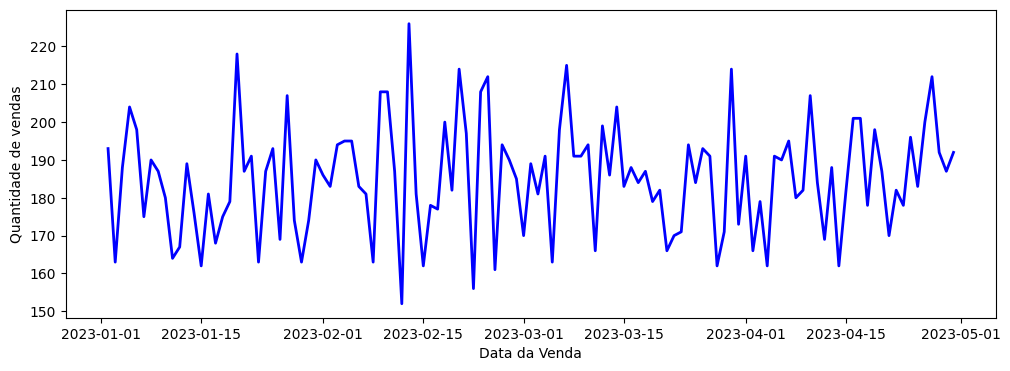

In [57]:
# Criando gráfico de linhas para representar datas, geralmente é o mais utilizado para retratar datas:

fig = plt.figure(figsize = (12, 4))

plt.xlabel('Data da Venda')

plt.ylabel('Quantidade de vendas')

x = venda_por_data['Data']

y = venda_por_data['idcompra']

plt.plot(x,y, color = 'blue', linewidth = '2')

plt.show()

In [58]:
#Plotando a média de preço com frete por nome de departamento (probleminha resolvido lá no começo do case, coloquei aqui novamente para deixar a sintax próxima ao plot)

agg_dept_preco = round(preco_certo.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


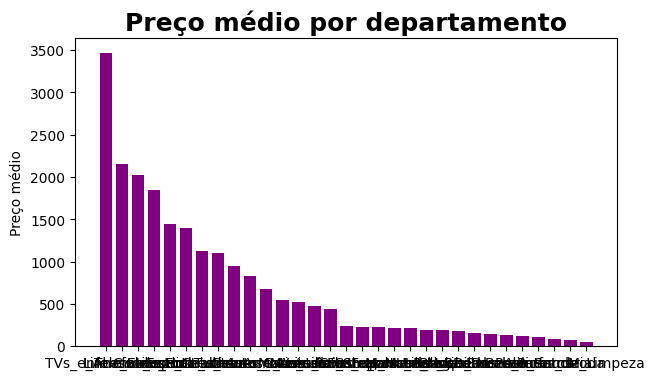

In [59]:
fig = plt.figure(figsize=(7,4))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="purple")

plt.ylabel("Preço médio")

plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black");




In [60]:
#OBS!!!!  colocarei uma linha de codigo para fazer a correção dos nomes inlegíveis

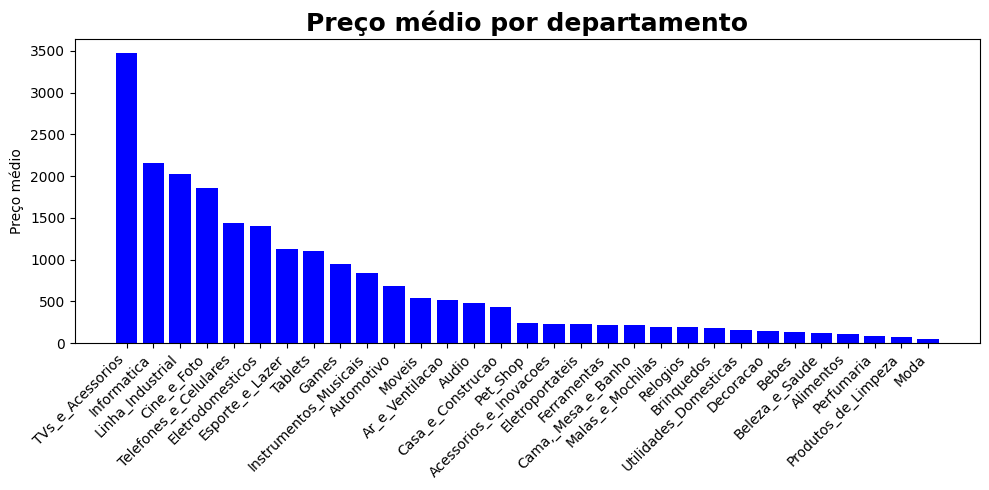

In [61]:
fig = plt.figure(figsize=(10,5))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="blue")

plt.ylabel("Preço médio")

plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black");

#Correção gráfico anterior

# Centralizar os nomes dos departamentos e rotacionar no eixo x
plt.xticks(rotation = 45, ha='right')

plt.tight_layout()

plt.show()

In [62]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [63]:
#  Utilizando a biblioteca "Potly" (Visualização de dados)

In [ ]:
#Essa biblioteca é um pouco mais robusta e mais sofisticada para algumas analises, ela não vem dentro do colab então precisamos instalar dessa forma:

%pip install plotly
%pip install cufflinks
%pip install chart-studio


In [65]:
#Depois da instalação vamos importar as bibliotecas:

import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [74]:
#Plotando o gráfico de barras para saber a média de idade por bandeira novamente só que com a biblioteca plotly  (mais opções para visualizações e com ferramentas embutidas para análises)

px.bar(agg_idade_bandeira, x = 'bandeira', y = 'idade', width=600, height=500 ) #OBS: adicionei "",width=800, height=600"" para dimencionar o gráfico



In [86]:
#Plotando gráfico de linhas para saber venda por data com essa biblioteca:

px.line(venda_por_data, x= 'Data', y='idcompra', width=1100, height=500)

In [93]:
#Plotando gráfico com preço com frete por departamento:

px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete",width=1300, height=500)

In [94]:
#Aqui é a mesma coisa apaneas adicionado alguns parâmetros de layout para mudar o texto de departamentos para outra direção

fig = px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete", width=1300, height=500)

fig.update_layout(xaxis_tickangle=-45)

fig.show()